In [46]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#importing the dataset
data=pd.read_csv('C:/Users/libin/Desktop/matches.csv')

In [48]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [49]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [50]:
#Handling Missing Values
#We can drop column called umpire3.
data_final=data.drop(['umpire3'],axis=1)

In [51]:
#Replacing the missing values with the most frequent values present in each column
final_data=data_final.fillna(data.mode().iloc[0])

In [52]:
final_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [53]:
final_data['winner'].value_counts().idxmax()

'Mumbai Indians'

In [54]:
final_data['winner'].value_counts().idxmin()

'Rising Pune Supergiants'

In [55]:
final_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [56]:
teams_per_season = final_data.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [57]:
year = 2008
win_per_season_data = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_data = win_per_season_data.append(win_series)

((2008, 'Rajasthan Royals'), 13)
((2008, 'Kings XI Punjab'), 10)
((2008, 'Chennai Super Kings'), 9)
((2008, 'Delhi Daredevils'), 7)
((2008, 'Mumbai Indians'), 7)
((2008, 'Kolkata Knight Riders'), 6)
((2008, 'Royal Challengers Bangalore'), 4)
((2008, 'Deccan Chargers'), 2)


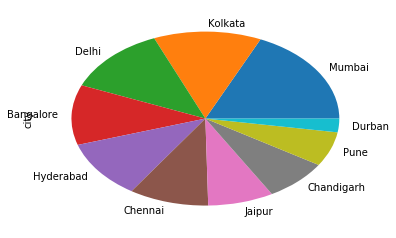

In [58]:
final_data['city'].value_counts().head(10).plot.pie()

In [59]:
winner_per_city =final_data.groupby('city')['winner'].value_counts()
winner_per_city

city           winner                     
Abu Dhabi      Rajasthan Royals                3
               Kings XI Punjab                 2
               Chennai Super Kings             1
               Kolkata Knight Riders           1
Ahmedabad      Rajasthan Royals                7
               Delhi Daredevils                1
               Kings XI Punjab                 1
               Mumbai Indians                  1
               Royal Challengers Bangalore     1
               Sunrisers Hyderabad             1
Bangalore      Royal Challengers Bangalore    30
               Mumbai Indians                 10
               Kolkata Knight Riders           6
               Kings XI Punjab                 5
               Chennai Super Kings             4
               Delhi Daredevils                3
               Rajasthan Royals                3
               Sunrisers Hyderabad             2
               Deccan Chargers                 1
               Gujarat Lio

In [60]:
venue_ser = final_data['venue'].value_counts()

In [61]:
venue_ser

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [62]:
venue_data = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_data = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_data = venue_data.append(temp_data, ignore_index=True)

In [63]:
venue_data

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [64]:
team_wins_ser = final_data['winner'].value_counts()

team_wins_data = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_data1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_data = team_wins_data.append(temp_data1, ignore_index=True)

In [65]:
team_wins_data

,team,wins
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [66]:
mvp_ser = final_data['player_of_match'].value_counts()

mvp_ten_data = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_data2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_data = mvp_ten_data.append(temp_data2, ignore_index=True)
        count += 1

In [67]:
mvp_ten_data

,player,wins
0,CH Gayle,25
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


In [68]:
toss_ser = final_data['toss_winner'].value_counts()

toss_data = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_data = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_data = toss_data.append(temp_data, ignore_index=True)

In [69]:
toss_data

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


In [70]:
win_count = 0
for index, value in final_data.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(final_data)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


In [71]:
#importing the dataset
deliveries=pd.read_csv('C:/Users/libin/Desktop/deliveries.csv')

In [72]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [73]:
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [74]:
sum(deliveries['extra_runs'])

12004

In [75]:
sum(deliveries['noball_runs'])

749

In [76]:
sum(deliveries['penalty_runs'])

10

In [77]:
sum(deliveries['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

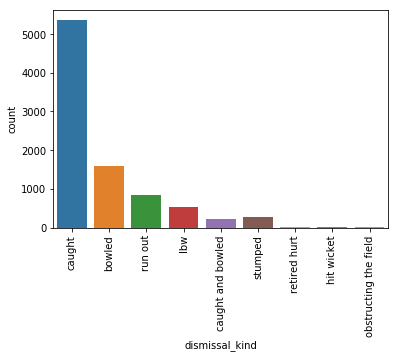

In [78]:
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)

CONCLUSION
1. From above code it is clear that Mumbai Indians are the most frequently appearing team in the winner column and also Mumbai     Indains have secured the most wins in four seasons(2010,2013,2017 and 2019).
2. Most of the matches have been hosted by Eden garden followed by Wankhede Stadium M Chinnaswamy Stadium etc.
3. Most of the player of match award has been received by CH Gayles for his good performance.
4. The probability of winning if won the toss: 0.52.